# Programa que me permite graficar 3 variables diferentes en un mismo plot

## Lizeth Daniela Jaimes González - 2218062

### La superficie del Sol se divide en: fotosfera, cromosfera, región de transición y corona. En estas partes las variables de estado temperatura, presión y densidad se comportan de manera diferente. Para un estado en equilibrio, estas variables vienen dadas por la siguiente gráfica:


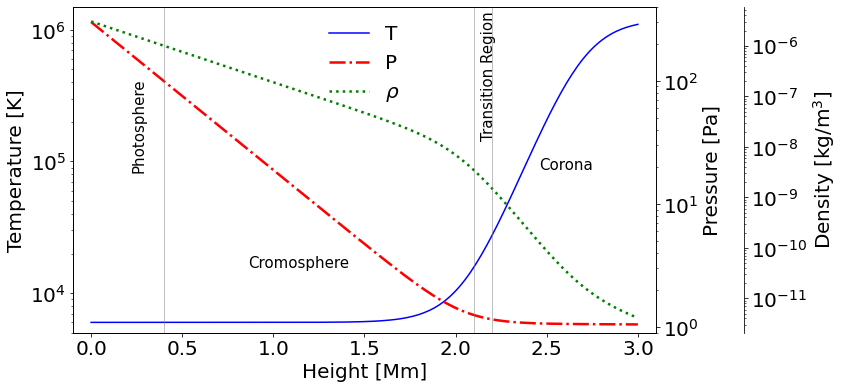

In [3]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab

params = {'legend.fontsize': '20',
         'figure.figsize': (12, 6),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20'}
pylab.rcParams.update(params)

x = np.linspace(0, 3, 200)
vec1 = 603000. + 597000.*np.tanh(4*(-2.7 + x)); #Temperature
vec2 = (8541.82*np.exp(-1.15311*10**(-6)*(1.206*10**6*(-2.7 + x) - 298500*np.log(6000*np.exp(4*(2.7 - x)) + 1.2*10**6*np.exp(4*(-2.7 + x))))))*10**(-6); #Pressure
vec3 = ((3.70451*10**7*np.exp(-1.39065*x)*(2.94125*10**8*np.cosh(4*x) - 2.94125*10**8*np.sinh(4*x))**0.344204)/(1.01005 + np.tanh(4*(-2.7 + x))))*10**(-18); #Density

fig, host = plt.subplots()
fig.subplots_adjust(right=0.8)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.15))
par2.spines["right"].set_visible(True)

host.set_yscale('log')
par1.set_yscale('log')
par2.set_yscale('log')

host.set_xlim(-0.1, 3.1)
host.set_ylim(5e3, 1.5e6)
par1.set_ylim(0.9, 4e2)
#par2.set_ylim(np.min(vec3), np.max(vec3))

p1, = host.plot(x, vec1, "b-", label="T",  linewidth=1.5, linestyle="-")
p2, = par1.plot(x, vec2, "r-", label="P",  linewidth=2.5, linestyle="-.")
p3, = par2.plot(x, vec3, "g-", label=r"$\rho$",  linewidth=2.5, linestyle=":")

host.set_xlabel(r'Height [Mm]')
host.set_ylabel(r'Temperature [K]')
par1.set_ylabel(r'Pressure [Pa]')
par2.set_ylabel(r'Density [kg/m$^3$]')


lines = [p1, p2, p3]


leg = plt.legend(lines, [l.get_label() for l in lines], loc='upper center', frameon=False)


plt.axvline(x=0.4, color ='gray',  linewidth=1, linestyle="-", alpha=0.5)
plt.axvline(x=2.1, color ='gray',  linewidth=1, linestyle="-", alpha=0.5)
plt.axvline(x=2.2, color ='gray',  linewidth=1, linestyle="-", alpha=0.5)

plt.annotate(text='Photosphere', xy = (0.1,0.5), rotation = 90, fontsize=15, xycoords='axes fraction')
plt.annotate(text='Cromosphere', xy = (0.3,0.2), rotation = 0, fontsize=15, xycoords='axes fraction')
plt.annotate(text='Transition Region', xy = (0.7,0.6), rotation = 90, fontsize=15, xycoords='axes fraction')
plt.annotate(text='Corona', xy = (0.8,0.5), rotation = 0, fontsize=15, xycoords='axes fraction')


plt.show()